In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
niter_metro, step = 32000, 5
niter_emcee, nwalkers, scale = 32*1000, 32, {'a': 0.0003, 'h': 0.01, 'k': 0.01, 'm': 0.03}
niter_smala, eps, alpha = 15000, 1.2, 0.14
niter_alsmala, aleps, alalpha, bern_a, bern_b = 15000, 0.6, 0.14, 5, 0.1

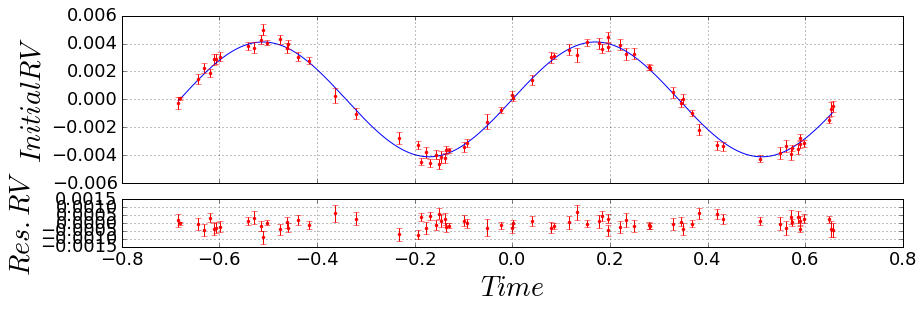

In [3]:
np.random.seed(200000)
initial = [{'a': 0.2275, 'h': 0.00,'k': 0.00, 'm': 0.001965}]
initial_state = state.State(planets = initial, ignore_vars='m')
obs = driver.create_obs(initial_state, 70, 3.5e-4, 9e-5, 1.37)
driver.plot_obs(initial_state, obs, [14,3])

# Metropolis-Hastings

In [5]:
metro_Bundle, metro_Hash = driver.run_mh('simple_mh_1', niter_metro, initial_state, obs, scale, step, 5000)

Progress: 0.003125%, 2 accepted steps have been made, time: 2017-03-08 07:51:29.348542
Progress: 15.628%, 3028 accepted steps have been made, time: 2017-03-08 07:51:49.548064
Progress: 31.253%, 6068 accepted steps have been made, time: 2017-03-08 07:52:06.931596
Progress: 46.878%, 9087 accepted steps have been made, time: 2017-03-08 07:52:25.963000
Progress: 62.503%, 12134 accepted steps have been made, time: 2017-03-08 07:52:46.881461
Progress: 78.128%, 15132 accepted steps have been made, time: 2017-03-08 07:53:04.883257
Progress: 93.753%, 18152 accepted steps have been made, time: 2017-03-08 07:53:22.932262
Acceptance rate: 60.366%
The id of the simulation is: ebd38df4fe1d62e4745bef06209ab5dd
The end time of the simulation is 2017-03-08 07:53:30.446589


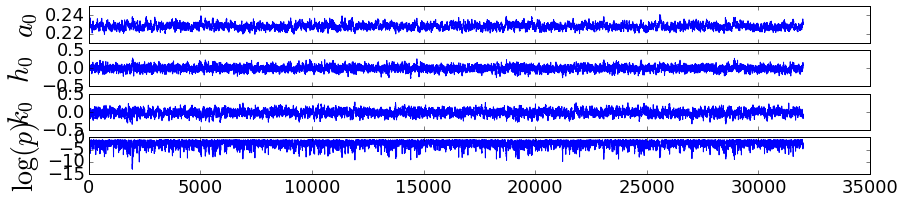

In [6]:
driver.plot_chains(metro_Bundle, [14,3])

Eliminated burn in, sampled every 2.
Selected some 100 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.22814256 -0.00457148 -0.01869581]


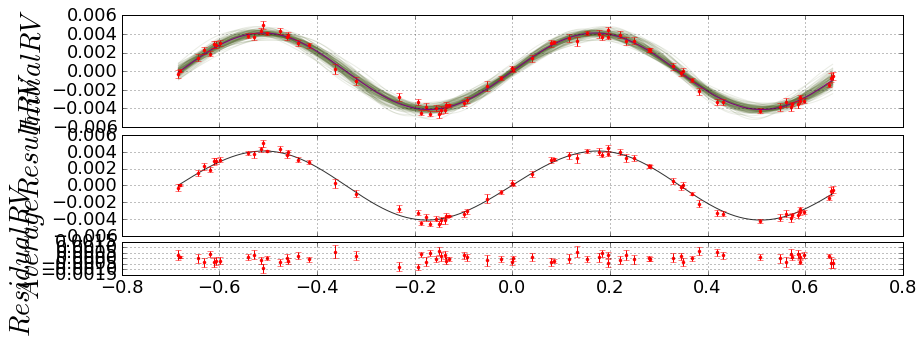

In [7]:
driver.return_trimmed_results(metro_Bundle, 100, [14,2], 0.5, 2)

AC time 6.0
AC time 3.0
AC time 4.0


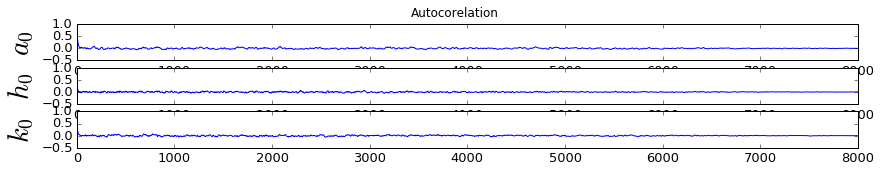

In [8]:
driver.plot_ACTimes(metro_Bundle, [14,3])

# Emcee

In [9]:
emcee_Bundle, emcee_Hash = driver.run_emcee('simple_em_1', niter_emcee, initial_state, obs, nwalkers, scale, 200)

Progress: 0.1%, time: 2017-03-08 07:53:35.358211
Progress: 20.1%, time: 2017-03-08 07:53:56.622353
Progress: 40.1%, time: 2017-03-08 07:54:18.320116
Progress: 60.1%, time: 2017-03-08 07:54:40.144870
Progress: 80.1%, time: 2017-03-08 07:55:02.572107
Error(s): 0
Acceptance rate: 104.691%
The id of the simulation is: 93376242f98c62997b08932935fed969
The end time of the simulation is 2017-03-08 07:55:25.837209


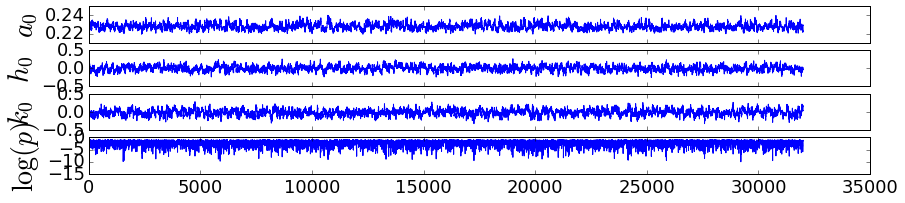

In [10]:
driver.plot_chains(emcee_Bundle, [14,3])

Eliminated burn in, sampled every 2.
Selected some 100 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.22804428  0.00204721 -0.0137528 ]


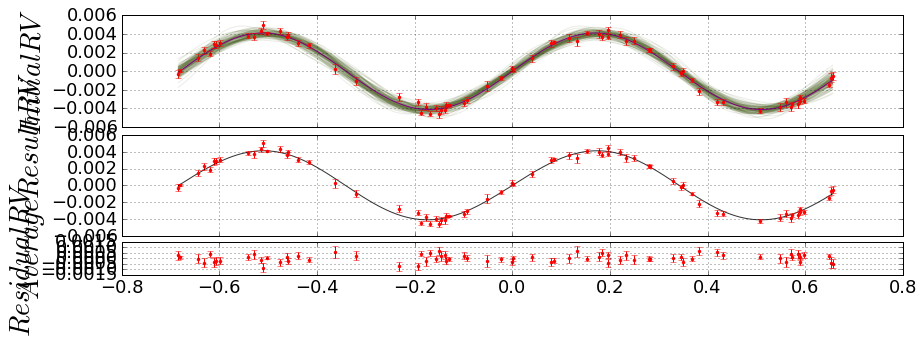

In [11]:
driver.return_trimmed_results(emcee_Bundle, 100, [14,2], 0.5, 2)

AC time 14.125
AC time 14.8125
AC time 13.6875


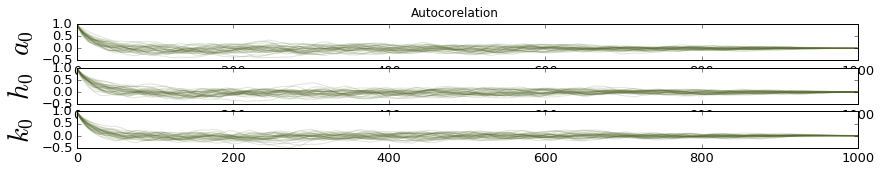

In [12]:
driver.plot_ACTimes(emcee_Bundle, [14,3])

# Smala

In [13]:
smala_Bundle, smala_Hash = driver.run_smala('simple_sm_1', niter_smala, initial_state, obs, eps, alpha, 1000)

Progress: 0.0066667%, 1 accepted steps have been made, time: 2017-03-08 07:55:30.830921
Progress: 6.6733%, 639 accepted steps have been made, time: 2017-03-08 07:56:06.393817
Progress: 13.34%, 1325 accepted steps have been made, time: 2017-03-08 07:56:41.571296
Progress: 20.007%, 1968 accepted steps have been made, time: 2017-03-08 07:57:14.547610
Progress: 26.673%, 2609 accepted steps have been made, time: 2017-03-08 07:57:55.904130
Progress: 33.34%, 3270 accepted steps have been made, time: 2017-03-08 07:58:28.051250
Progress: 40.007%, 3934 accepted steps have been made, time: 2017-03-08 07:58:59.806538
Progress: 46.673%, 4576 accepted steps have been made, time: 2017-03-08 07:59:36.752618
Progress: 53.34%, 5213 accepted steps have been made, time: 2017-03-08 08:00:10.045728
Progress: 60.007%, 5867 accepted steps have been made, time: 2017-03-08 08:00:42.270462
Progress: 66.673%, 6521 accepted steps have been made, time: 2017-03-08 08:01:13.657723
Progress: 73.34%, 7171 accepted step

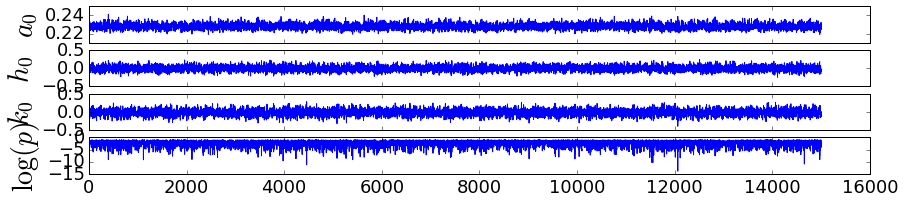

In [14]:
driver.plot_chains(smala_Bundle, [14,3])

Eliminated burn in, sampled every 2.
Selected some 100 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.22803719 -0.00255174 -0.01744224]


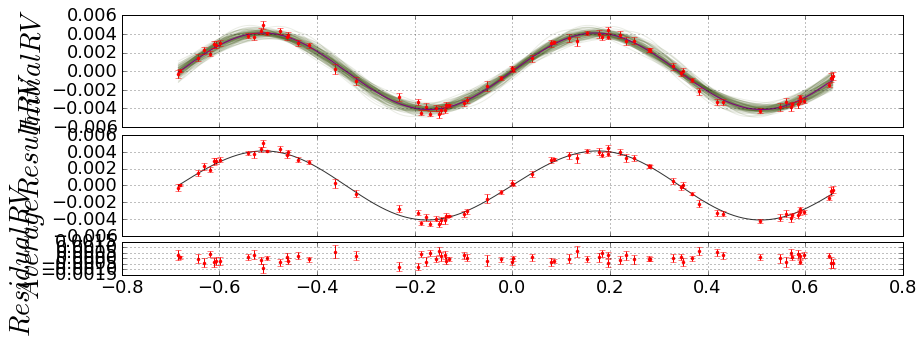

In [15]:
driver.return_trimmed_results(smala_Bundle, 100, [14,2], 0.5, 2)

AC time 1.0
AC time 1.0
AC time 1.0


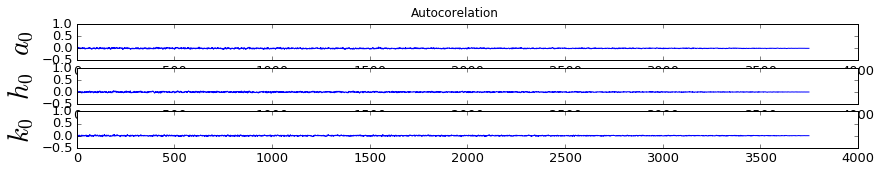

In [16]:
driver.plot_ACTimes(smala_Bundle, [14,3])

# Alsmala

In [17]:
alsmala_Bundle, alsmala_Hash = driver.run_alsmala('simple_al_1', niter_smala, initial_state, obs, aleps, alalpha, bern_a, bern_b, 1000)

Progress: 0.0066667%, 2 accepted steps have been made, time: 2017-03-08 08:03:53.944208
Progress: 6.6733%, 682 accepted steps have been made, time: 2017-03-08 08:04:07.887240
Progress: 13.34%, 1354 accepted steps have been made, time: 2017-03-08 08:04:24.719344
Progress: 20.007%, 2068 accepted steps have been made, time: 2017-03-08 08:04:41.407335
Progress: 26.673%, 2660 accepted steps have been made, time: 2017-03-08 08:04:50.235837
Progress: 33.34%, 3258 accepted steps have been made, time: 2017-03-08 08:04:58.477742
Progress: 40.007%, 3883 accepted steps have been made, time: 2017-03-08 08:05:06.973072
Progress: 46.673%, 4427 accepted steps have been made, time: 2017-03-08 08:05:12.791953
Progress: 53.34%, 4999 accepted steps have been made, time: 2017-03-08 08:05:20.002285
Progress: 60.007%, 5547 accepted steps have been made, time: 2017-03-08 08:05:27.275518
Progress: 66.673%, 6073 accepted steps have been made, time: 2017-03-08 08:05:31.950765
Progress: 73.34%, 6546 accepted step

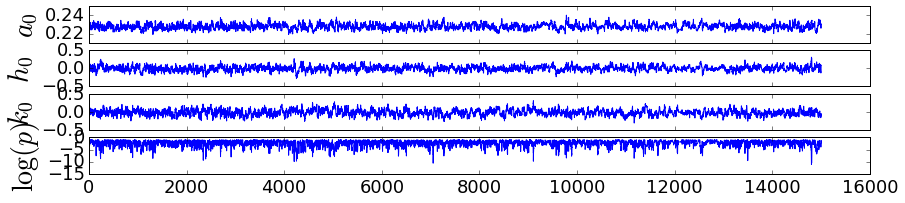

In [18]:
driver.plot_chains(alsmala_Bundle, [14,3])

Eliminated burn in, sampled every 2.
Selected some 100 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[  2.28014117e-01  -1.36622981e-04  -1.82725545e-02]


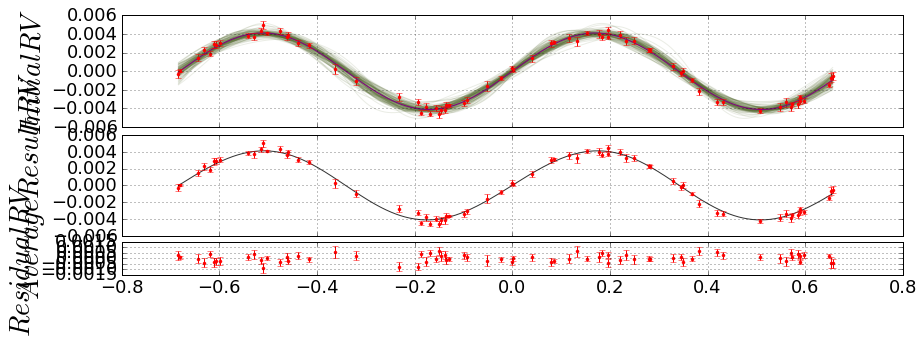

In [19]:
driver.return_trimmed_results(alsmala_Bundle, 100, [14,2], 0.5, 2)

AC time 6.0
AC time 5.0
AC time 5.0


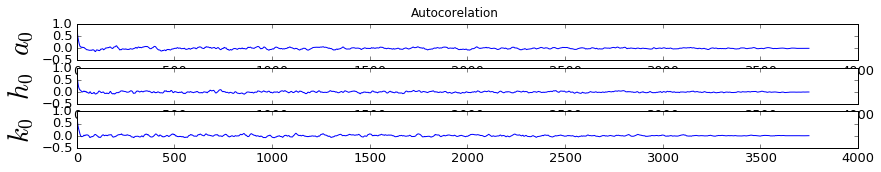

In [20]:
driver.plot_ACTimes(alsmala_Bundle, [14,3])

# Analysis / Comparison

In [21]:
print driver.efficacy(metro_Bundle.mcmc_Niter, metro_Bundle.mcmc_actimes, metro_Bundle.mcmc_clocktimes)
print driver.efficacy(emcee_Bundle.mcmc_Niter, emcee_Bundle.mcmc_actimes, emcee_Bundle.mcmc_clocktimes)
print driver.efficacy(smala_Bundle.mcmc_Niter, smala_Bundle.mcmc_actimes, smala_Bundle.mcmc_clocktimes)
print driver.efficacy(alsmala_Bundle.mcmc_Niter, alsmala_Bundle.mcmc_actimes, alsmala_Bundle.mcmc_clocktimes)

44.0417130736
19.5547488578
30.0537477016
20.7407093009


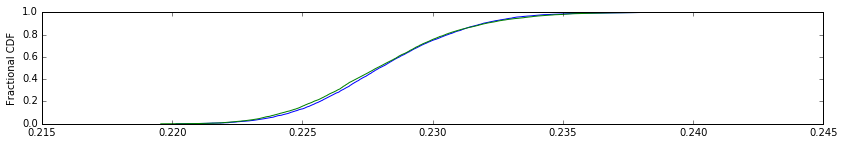

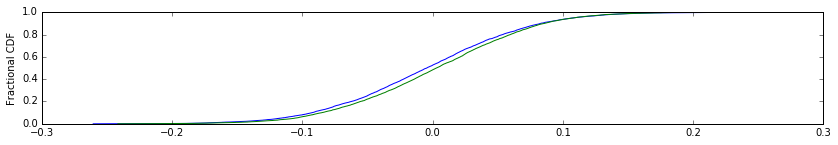

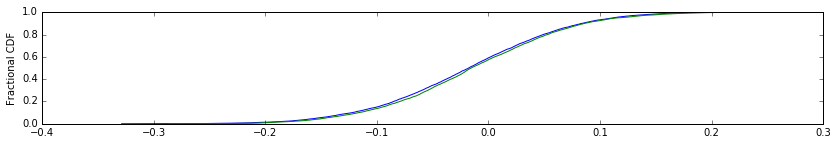

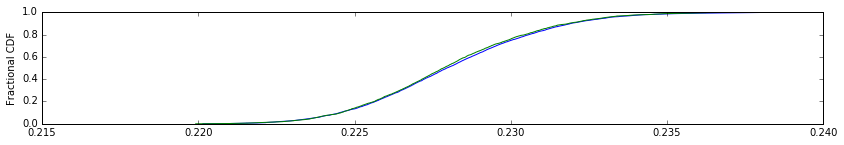

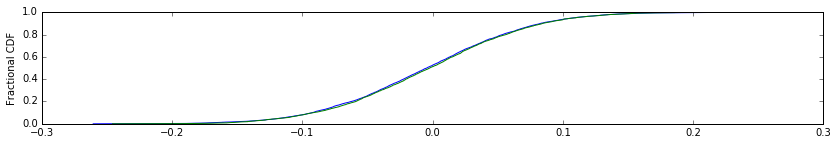

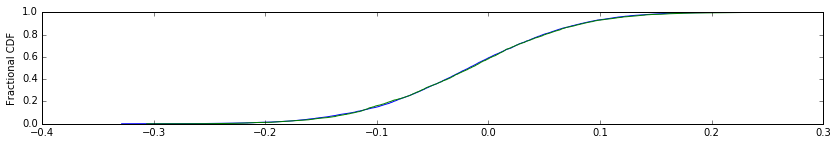

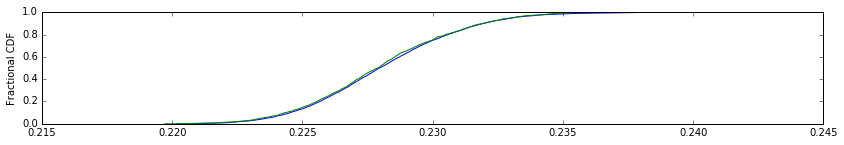

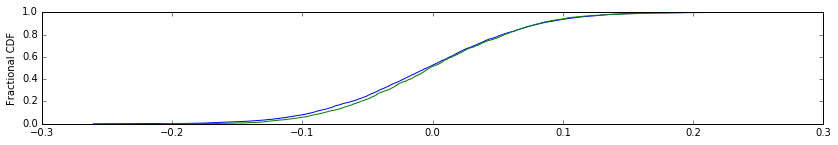

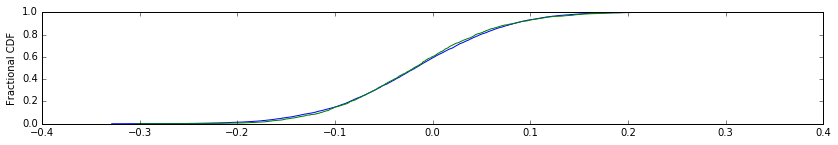

In [22]:
driver.compare_cdf(metro_Bundle.mcmc_trimmedchain, emcee_Bundle.mcmc_trimmedchain, [14,2])
driver.compare_cdf(metro_Bundle.mcmc_trimmedchain, smala_Bundle.mcmc_trimmedchain, [14,2])
driver.compare_cdf(metro_Bundle.mcmc_trimmedchain, alsmala_Bundle.mcmc_trimmedchain, [14,2])

In [23]:
driver.calc_kstatistic(metro_Bundle.mcmc_trimmedchain, emcee_Bundle.mcmc_trimmedchain)
driver.calc_kstatistic(metro_Bundle.mcmc_trimmedchain, smala_Bundle.mcmc_trimmedchain)
driver.calc_kstatistic(metro_Bundle.mcmc_trimmedchain, alsmala_Bundle.mcmc_trimmedchain)

Ks_2sampResult(statistic=0.032750000000000001, pvalue=0.00036325072966234039)
Ks_2sampResult(statistic=0.049499999999999988, pvalue=5.6909541321926929e-09)
Ks_2sampResult(statistic=0.028500000000000025, pvalue=0.0029383929441770731)
Ks_2sampResult(statistic=0.02461666666666662, pvalue=0.089252017992300758)
Ks_2sampResult(statistic=0.017283333333333317, pvalue=0.42754294720939023)
Ks_2sampResult(statistic=0.014074999999999976, pvalue=0.68963872351635769)
Ks_2sampResult(statistic=0.029699999999999949, pvalue=0.021645621355655315)
Ks_2sampResult(statistic=0.038533333333333308, pvalue=0.00098230232690569067)
Ks_2sampResult(statistic=0.026083333333333347, pvalue=0.060945226166483166)


# Saving data for future use

In [24]:
%store metro_Bundle
%store emcee_Bundle
%store smala_Bundle
%store alsmala_Bundle

Stored 'metro_Bundle' (McmcBundle)
Stored 'emcee_Bundle' (McmcBundle)
Stored 'smala_Bundle' (McmcBundle)
Stored 'alsmala_Bundle' (McmcBundle)
